In [110]:
import pandas as pd
import numpy as np

melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [111]:
melbourne_data.shape

(13580, 21)

In [89]:
melbourne_data.head

<bound method NDFrame.head of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2

In [112]:
melbourne_data=melbourne_data.dropna(axis=0)

In [113]:
melbourne_data.shape

(6196, 21)

In [114]:
y = melbourne_data.Price

In [115]:
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

In [147]:
melbourne_features = ['Rooms','Landsize','Car','Bathroom','Distance','BuildingArea','YearBuilt','Lattitude','Longtitude','Postcode']

In [148]:
melbourne_features

['Rooms',
 'Landsize',
 'Car',
 'Bathroom',
 'Distance',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Postcode']

In [149]:
X = melbourne_data[melbourne_features]

In [150]:
X.describe()
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [151]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [152]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Landsize  Car  Bathroom  Distance  BuildingArea  YearBuilt  \
1      2     156.0  0.0       1.0       2.5          79.0     1900.0   
2      3     134.0  0.0       2.0       2.5         150.0     1900.0   
4      4     120.0  2.0       1.0       2.5         142.0     2014.0   
6      3     245.0  0.0       2.0       2.5         210.0     1910.0   
7      2     256.0  2.0       1.0       2.5         107.0     1890.0   

   Lattitude  Longtitude  Postcode  
1   -37.8079    144.9934    3067.0  
2   -37.8093    144.9944    3067.0  
4   -37.8072    144.9941    3067.0  
6   -37.8024    144.9993    3067.0  
7   -37.8060    144.9954    3067.0  
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [153]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

433.1020012911556

In [154]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

249727.50290510006


In [155]:
val_X


,Rooms,Landsize,Car,Bathroom,Distance,BuildingArea,YearBuilt,Lattitude,Longtitude,Postcode
4850,2,96.0,0.0,1.0,4.5,71.0,1880.0,-37.85010,144.99530,3181.0
2307,2,0.0,1.0,1.0,7.7,70.0,1965.0,-37.89020,144.99070,3184.0
10090,2,136.0,1.0,1.0,4.6,58.0,1892.0,-37.85542,144.99571,3181.0
3645,3,205.0,2.0,2.0,5.6,184.0,1995.0,-37.79930,145.02670,3101.0
4930,2,400.0,1.0,1.0,8.8,88.0,1955.0,-37.73520,144.98520,3072.0
...,...,...,...,...,...,...,...,...,...,...
8223,2,0.0,1.0,1.0,9.9,82.0,2011.0,-37.73240,144.93770,3044.0
11190,3,590.0,2.0,2.0,22.2,151.0,1981.0,-37.89628,145.22294,3179.0
8563,1,1175.0,1.0,1.0,13.9,35.0,1970.0,-37.78490,144.82720,3020.0
1867,2,585.0,1.0,1.0,13.6,97.0,1950.0,-37.87920,145.09480,3148.0


In [156]:
val_y

4850      815000.0
2307      655000.0
10090     957500.0
3645     1330000.0
4930      722000.0
           ...    
8223      520000.0
11190     870000.0
8563      200000.0
1867     1002000.0
8375     1710000.0
Name: Price, Length: 1549, dtype: float64

In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [158]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  254311
Max leaf nodes: 500  		 Mean Absolute Error:  238721
Max leaf nodes: 5000  		 Mean Absolute Error:  247396


In [159]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor(max_leaf_nodes=500)
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

239308.00999231488


In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))


182842.73047742012


In [169]:
val_X

,Rooms,Landsize,Car,Bathroom,Distance,BuildingArea,YearBuilt,Lattitude,Longtitude,Postcode
4850,2,96.0,0.0,1.0,4.5,71.0,1880.0,-37.85010,144.99530,3181.0
2307,2,0.0,1.0,1.0,7.7,70.0,1965.0,-37.89020,144.99070,3184.0
10090,2,136.0,1.0,1.0,4.6,58.0,1892.0,-37.85542,144.99571,3181.0
3645,3,205.0,2.0,2.0,5.6,184.0,1995.0,-37.79930,145.02670,3101.0
4930,2,400.0,1.0,1.0,8.8,88.0,1955.0,-37.73520,144.98520,3072.0
...,...,...,...,...,...,...,...,...,...,...
8223,2,0.0,1.0,1.0,9.9,82.0,2011.0,-37.73240,144.93770,3044.0
11190,3,590.0,2.0,2.0,22.2,151.0,1981.0,-37.89628,145.22294,3179.0
8563,1,1175.0,1.0,1.0,13.9,35.0,1970.0,-37.78490,144.82720,3020.0
1867,2,585.0,1.0,1.0,13.6,97.0,1950.0,-37.87920,145.09480,3148.0


In [172]:
val_y

4850      815000.0
2307      655000.0
10090     957500.0
3645     1330000.0
4930      722000.0
           ...    
8223      520000.0
11190     870000.0
8563      200000.0
1867     1002000.0
8375     1710000.0
Name: Price, Length: 1549, dtype: float64

In [173]:
melb_preds

array([ 981352.5,  537155. ,  950982. , ...,  240810. , 1209885. ,
       1894065. ])

In [161]:
corr = X.corr()

<Axes: >

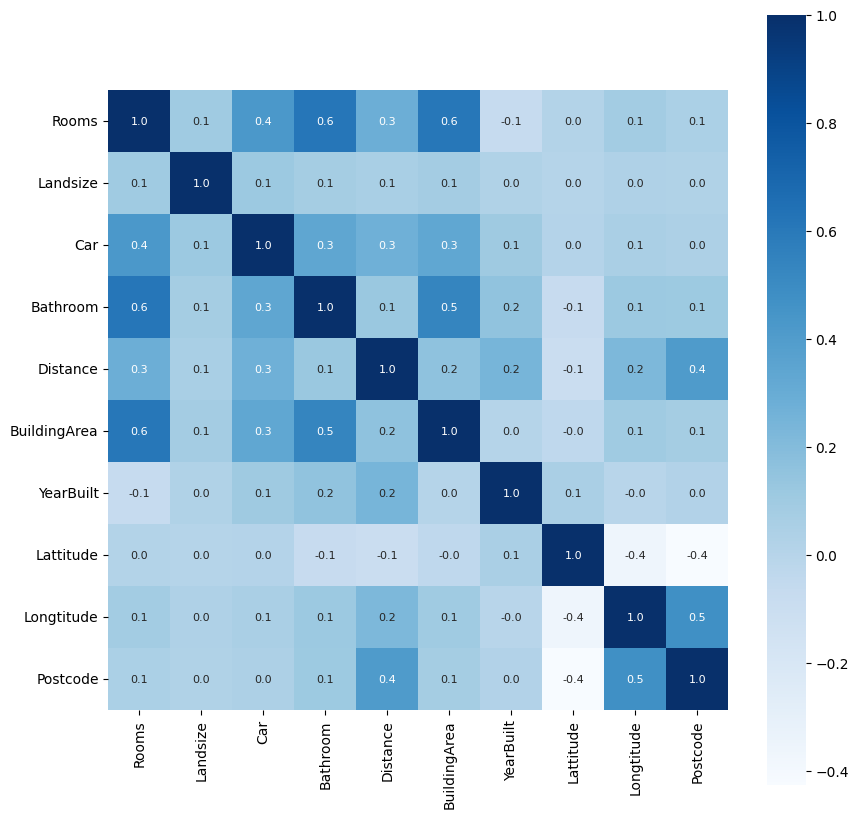

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [167]:
input_data = (2,585,1,1,13.6,97,1950,-37.87920,145.09480,3148)

#myvals = ['Rooms','Landsize','Car','Bathroom','Distance','BuildingArea','YearBuilt','Lattitude','Longtitude']

    # changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

    # reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = melbourne_model.predict(input_data_reshaped)
print(prediction)


prediction2 = forest_model.predict(input_data_reshaped)
print(prediction2)




[794944.44444444]
[1209885.]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
